In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/MyDrive/Colab Notebooks/English'

/content/drive/MyDrive/Colab Notebooks/English


# نصب پکیج های مورد نیاز

In [3]:
!pip install pandas==0.24.2 matplotlib==3.1.0 scikit-learn==0.24.2 numpy==1.16.4

# خواندن دیتاست

In [4]:
import pandas as pd 

test  = pd.read_csv('test_english.csv')
train = pd.read_csv('train_english.csv')

# نمایش ابعاد دیتاست و 5 سطر اول آن

In [5]:
print(train.shape)
print(test.shape)
train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# نمایش پراکندگی ارقام

Text(0, 0.5, 'Frequency')

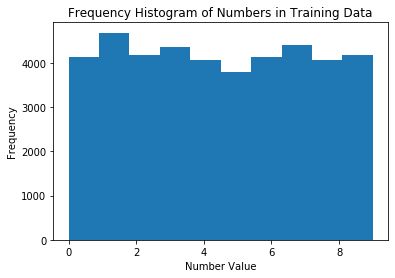

In [6]:
import matplotlib.pyplot as plt
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")

# نمایش 25 تصویر اول

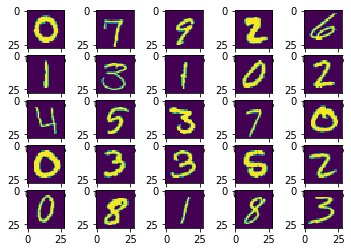

In [7]:
import math

f, ax = plt.subplots(5, 5)

for i in range(1,26):
    data = train.iloc[i,1:785].values
    nrows, ncols = 28, 28
    grid = data.reshape((nrows, ncols))
    n=math.ceil(i/5)-1
    m=[0,1,2,3,4]*5
    ax[m[i-1], n].imshow(grid)

# train نمایش تصویر از دیتاست 

enter image id : 5


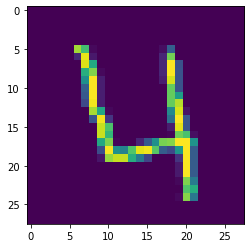

In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np
inp = int(input("enter image id : "))
data = train.iloc[inp-2,1:784].values
data = np.append(data , [0])
nrows, ncols = 28,28
grid = data.reshape((nrows, ncols))
plt.imshow(grid)

# test نمایش تصویر از دیتاست

enter image id : 2
(784,)


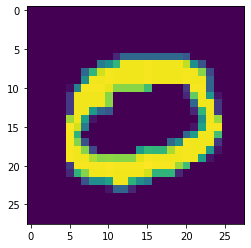

In [9]:
import math
import matplotlib.pyplot as plt
inp = int(input("enter image id : "))
data = test.iloc[inp-1,0:785].values 
print(data.shape)
grid = data.reshape((28,28))
plt.imshow(grid)

# PCA توزیع پذیری ارقام براساس 

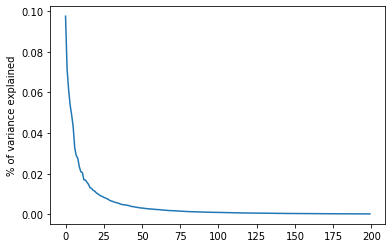

In [10]:
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=200)
pca.fit(train.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')

pca = decomposition.PCA(n_components=50)
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']

PCtest = pd.DataFrame(pca.transform(test))

# نمایش سه بعدی پراکندگی داده ها بر اساس
# pc1 , pc2 , pc3

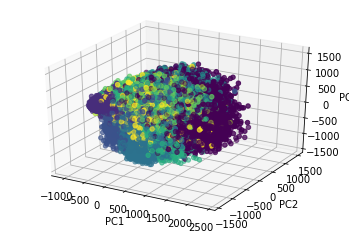

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =PCtrain[0]
y =PCtrain[1]
z =PCtrain[2]

colors = [int(i % 9) for i in PCtrain['label']]
ax.scatter(x, y, z, c=colors, marker='o', label=colors)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

# MLP اجرای الگوریتم  

In [12]:
from sklearn.neural_network import MLPClassifier
y = PCtrain['label'][0:20000]
X=PCtrain.drop('label', axis=1)[0:20000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500,), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3500,), random_state=1,
              solver='lbfgs')

# نمایش معیار ها و ماتریس آشفتگی

In [13]:
from sklearn import  metrics

predicted = clf.predict(PCtrain.drop('label', axis=1)[20001:42000])
expected = PCtrain['label'][20001:42000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3500,), random_state=1,
              solver='lbfgs'):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2200
           1       0.98      0.98      0.98      2418
           2       0.96      0.96      0.96      2167
           3       0.95      0.94      0.94      2270
           4       0.96      0.96      0.96      2101
           5       0.94      0.95      0.95      2001
           6       0.97      0.98      0.97      2155
           7       0.96      0.97      0.96      2331
           8       0.94      0.94      0.94      2148
           9       0.94      0.93      0.94      2208

    accuracy                           0.96     21999
   macro avg       0.96      0.96      0.96     21999
weighted avg       0.96      0.96      0.96     21999


Confusion matrix:
[[2145    0    5    3    4    9   16    1    6   11]
 [   0 2380    9    3    3    

# گرفتن خروجی نهایی

In [14]:
output = pd.DataFrame(clf.predict(PCtest), columns =['Label'])
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('output_english.csv', index=False)